In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv("Data_processed/data.csv")

In [4]:
df.head()

,customer_lat,customer_lng,order_status,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,product_length_cm,product_height_cm,product_width_cm,seller_lat,seller_lng,order_time,recency,amount,frequency,product_category
0,-23.499063,-46.767939,1.0,89.80,24.94,1,0,8,114.74,1,...,46.0,39.0,22.0,-23.049552,-47.837621,5.0,287,89.800000,1,37
1,-20.794069,-49.365081,1.0,84.80,24.90,1,0,2,109.70,4,...,46.0,39.0,22.0,-23.049552,-47.837621,8.0,361,84.800000,1,37
2,-23.009475,-43.334530,1.0,89.80,18.00,1,0,2,107.80,4,...,46.0,39.0,22.0,-23.049552,-47.837621,25.0,316,89.800000,1,37
3,-23.590310,-46.723572,1.0,84.80,14.04,1,0,3,291.47,4,...,46.0,39.0,22.0,-23.049552,-47.837621,18.0,372,83.896667,3,37
4,-23.590310,-46.723572,1.0,96.99,9.36,1,0,3,291.47,4,...,48.0,27.0,18.0,-23.049552,-47.837621,18.0,372,83.896667,3,37


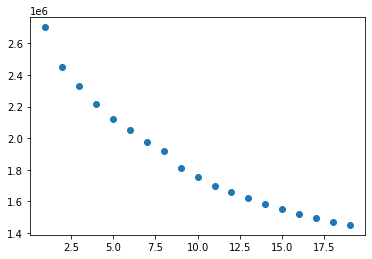

In [5]:
x = []
y = []
for n in range(1,20):
    x.append(n)
    estimator = make_pipeline(StandardScaler(),PCA(n_components=0.99), KMeans(n_clusters=n, random_state=1))
    estimator.fit(df)
    y.append(int(estimator.named_steps['kmeans'].inertia_))

plt.scatter(x, y)
plt.show()

For n_clusters = 3 The average silhouette_score is : 0.13233266302734545
For n_clusters = 4 The average silhouette_score is : 0.1661055908179424
For n_clusters = 5 The average silhouette_score is : 0.14220523127669255
For n_clusters = 6 The average silhouette_score is : 0.08321999310727436
For n_clusters = 7 The average silhouette_score is : 0.09492417950018359
For n_clusters = 8 The average silhouette_score is : 0.08058188494068458
For n_clusters = 9 The average silhouette_score is : 0.06508607026158354
For n_clusters = 10 The average silhouette_score is : 0.07025478798615624
For n_clusters = 11 The average silhouette_score is : 0.07581450869626963
For n_clusters = 12 The average silhouette_score is : 0.06189096667058706
For n_clusters = 13 The average silhouette_score is : 0.06252595784187442


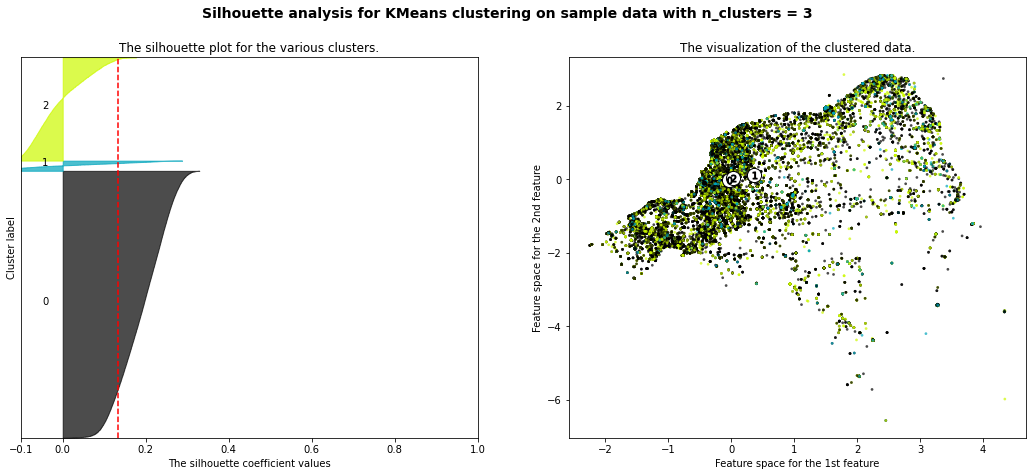

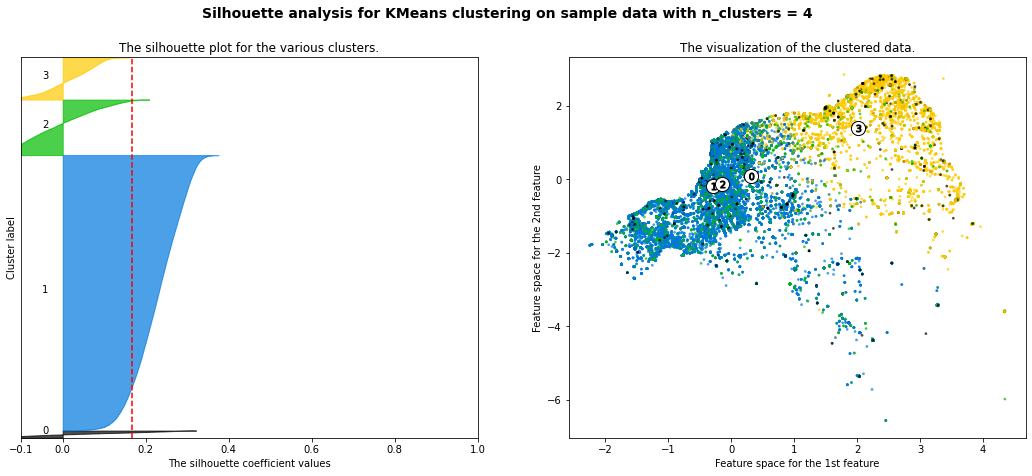

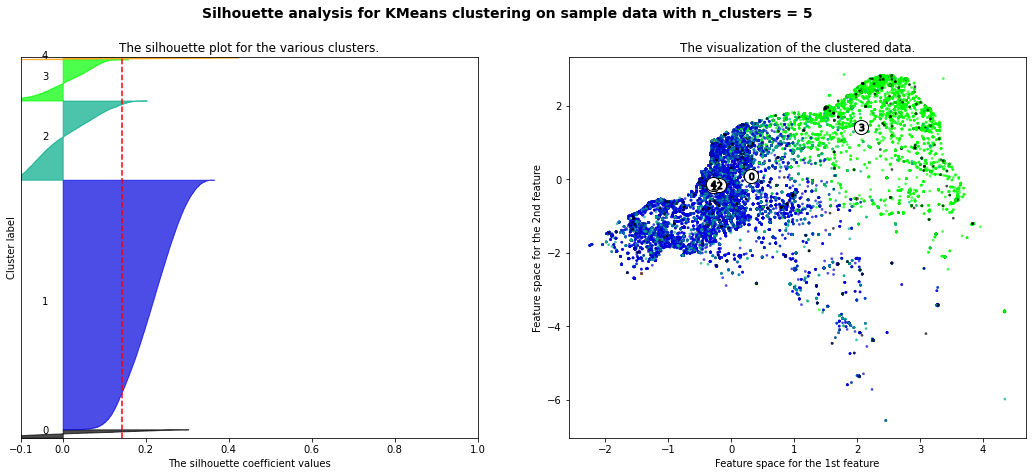

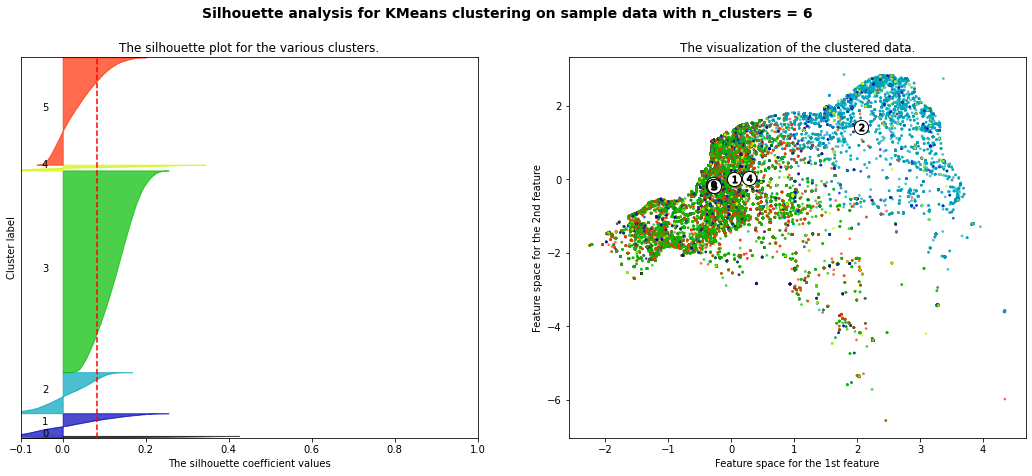

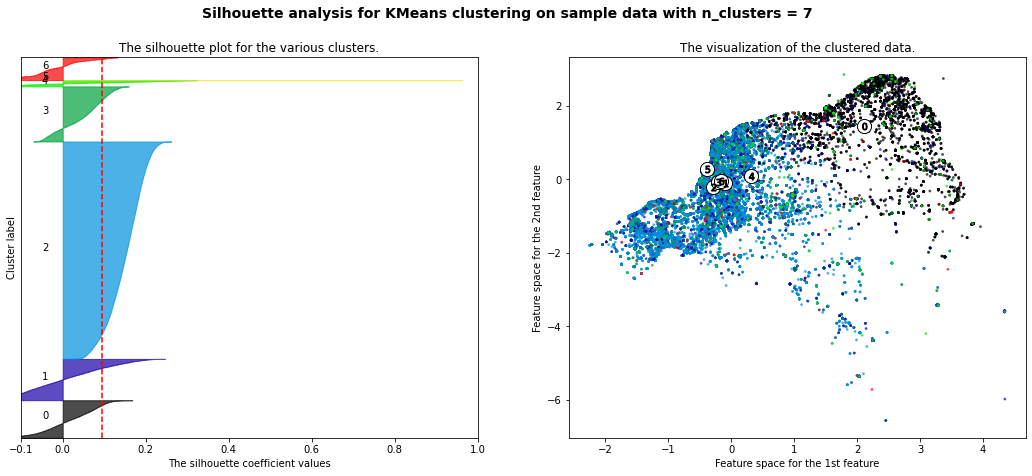

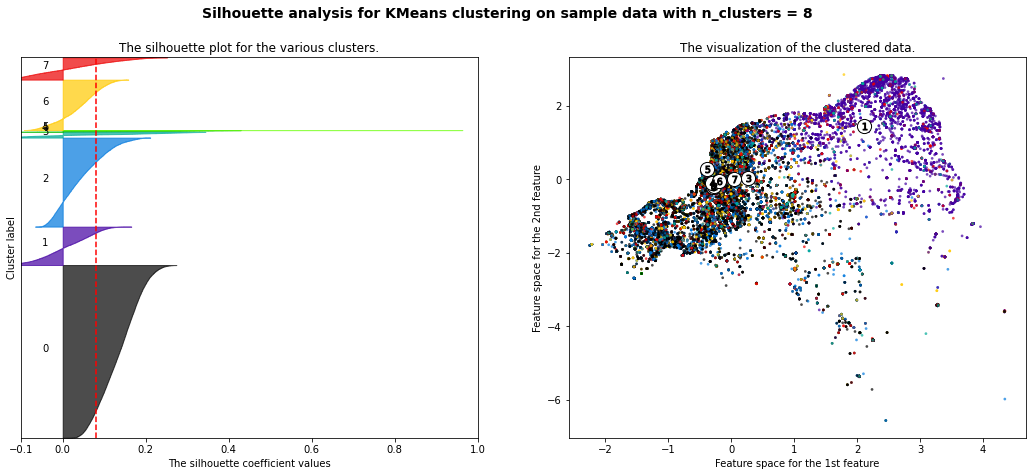

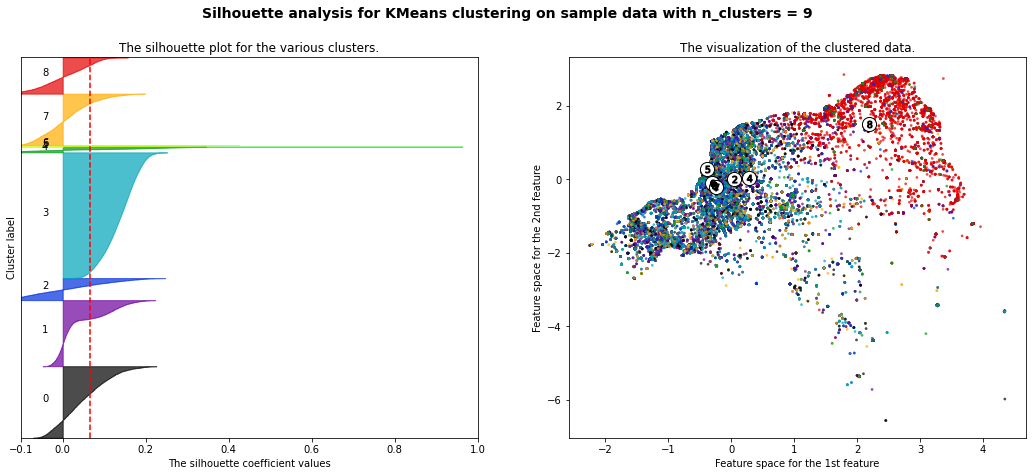

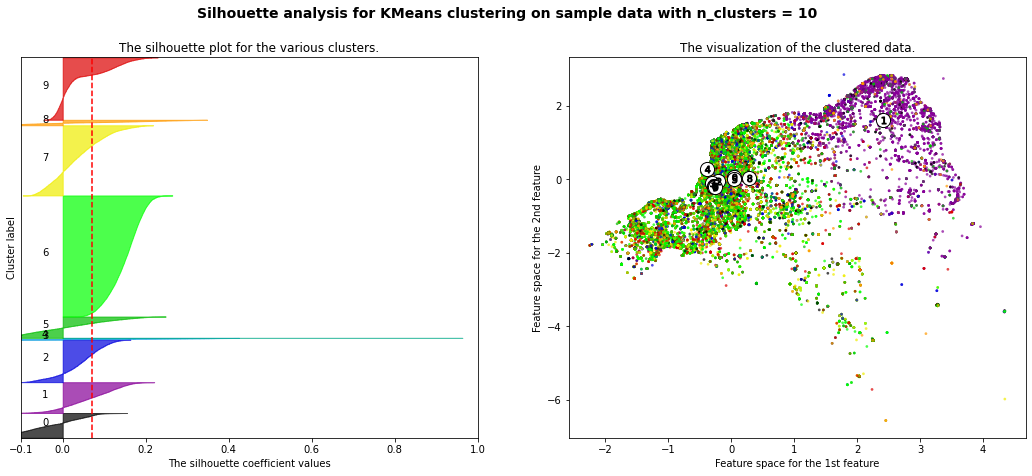

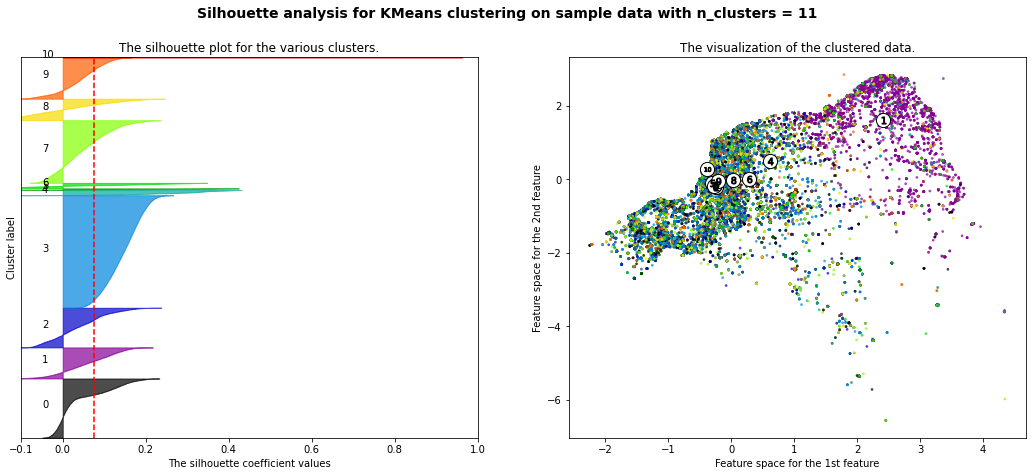

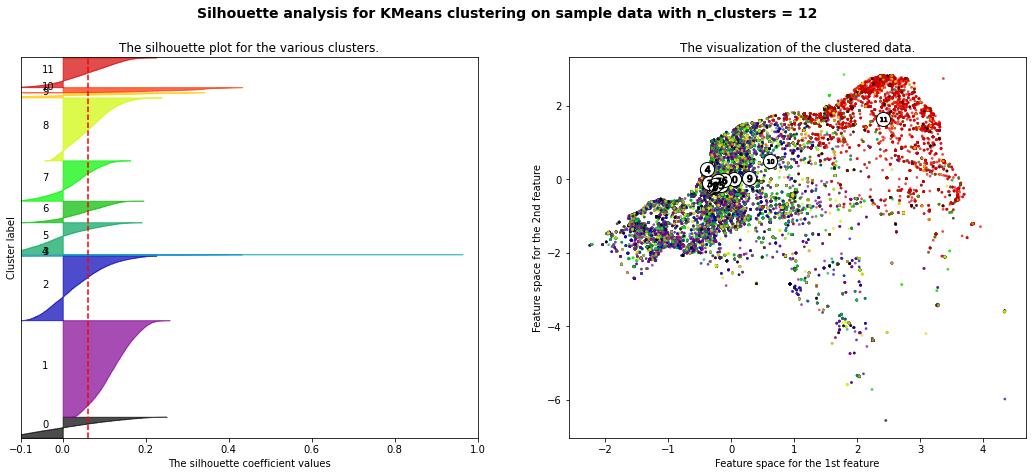

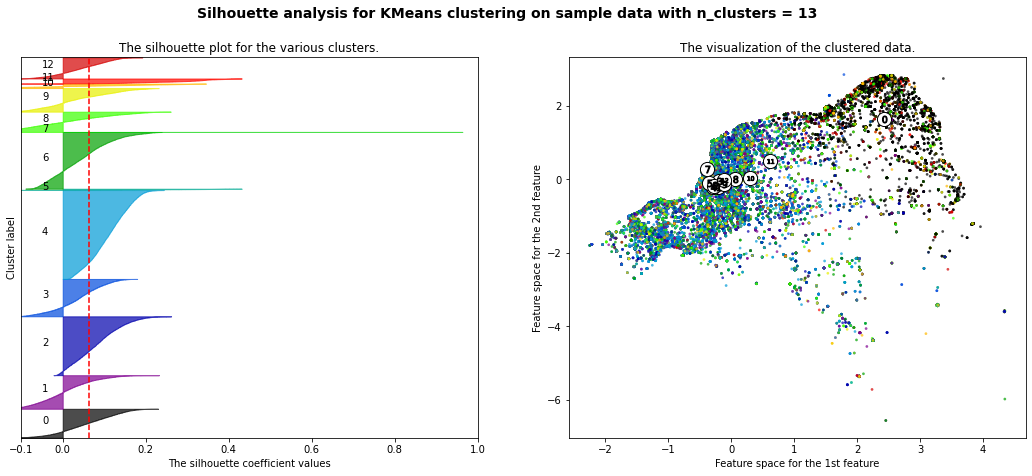

In [13]:
range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13 ]
X = StandardScaler().fit_transform(df)
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Visualisation des Clusters avec PCA

### PCA

In [ ]:
pca = PCA(n_components=0.95)
df_scaled = StandardScaler().fit_transform(df)
pca.fit(df_scaled)
pca.explained_variance_ratio_

array([0.16360792, 0.08217297, 0.07314623, 0.06645247, 0.05413793,
       0.05228903, 0.0517117 , 0.0478024 , 0.04218443, 0.0419482 ,
       0.04013208, 0.03639209, 0.03610179, 0.03316324, 0.03144519,
       0.02573789, 0.02272185, 0.02222856, 0.01900314, 0.01896644])

Text(0, 0.5, 'Explained variance')

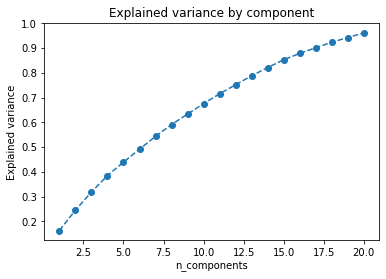

In [ ]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Explained variance by component")
plt.xlabel("n_components")
plt.ylabel("Explained variance")

In [ ]:
scores = pca.transform(df_scaled)
scores

array([[ 1.19139883,  0.5651092 , -1.29058815, ..., -0.01837175,
        -0.5749234 ,  0.20858007],
       [ 0.68221886,  0.92835831, -1.08922954, ..., -0.29273514,
        -0.15230842,  0.38434651],
       [ 0.5765697 ,  0.73824825, -0.95911667, ...,  0.24610468,
        -0.56300133,  0.20534489],
       ...,
       [-1.79565344,  0.31790974, -0.05633688, ..., -0.62800804,
        -0.09165973,  0.04716071],
       [-1.78547713, -0.13877626, -0.51175835, ...,  0.02324268,
        -0.071717  , -0.39625199],
       [ 5.09041678, -4.55997294,  2.63689406, ..., -1.60305127,
         0.76492585, -0.69299737]])

### KMeans

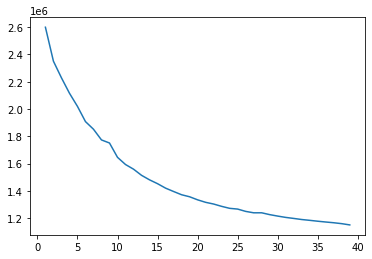

In [ ]:
x = []
y = []
for i in range(1,40):
    k_means_pca = KMeans(n_clusters=i, random_state=1)
    k_means_pca.fit(scores)
    x.append(i)
    y.append(k_means_pca.inertia_)
plt.plot(x, y)

In [ ]:
n_clusters = 10
k_means_pca = KMeans(n_clusters=n_clusters, random_state=1)
k_means_pca.fit(scores)

KMeans(n_clusters=10, random_state=1)

### Dataframe des données avec clusters et dimensions PCA

In [ ]:
df_k_means = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores)], axis=1)
df_k_means.columns.values[-20:] = ["Component 1", "Component 2", "Component 3", "Component 4", "Component 5",
                                    "Component 6", "Component 7", "Component 8", "Component 9", "Component 10",
                                    "Component 11", "Component 12", "Component 13", "Component 14", "Component 15",
                                    "Component 16", "Component 17", "Component 18", "Component 19", "Component 20"]
df_k_means["Segment KMeans PCA"] = k_means_pca.labels_
df_k_means

,customer_lat,customer_lng,order_status,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20,Segment KMeans PCA
0,-23.499063,-46.767939,1.0,89.80,24.94,1,0,8,114.74,1,...,-0.407581,-1.264103,-0.329392,-0.265576,-0.198149,-0.982476,-0.018372,-0.574923,0.208580,0
1,-20.794069,-49.365081,1.0,84.80,24.90,1,0,2,109.70,4,...,-0.443978,-1.132406,-0.039623,0.599968,0.278465,0.663353,-0.292735,-0.152308,0.384347,0
2,-23.009475,-43.334530,1.0,89.80,18.00,1,0,2,107.80,4,...,-0.552393,-1.170267,-0.144105,-0.151627,-1.368674,0.382174,0.246105,-0.563001,0.205345,0
3,-23.590310,-46.723572,1.0,84.80,14.04,1,0,3,291.47,4,...,-0.492940,-1.160252,-0.075855,0.199813,-0.915827,0.516935,-0.033346,-0.106819,0.882027,0
4,-23.590310,-46.723572,1.0,96.99,9.36,1,0,3,291.47,4,...,-0.219976,-0.489071,-0.292714,-0.025957,-0.753474,0.549055,0.077707,-0.461700,0.991138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112636,-1.461061,-48.483919,1.0,64.99,19.37,1,0,1,168.72,5,...,0.159420,-0.491440,0.075645,-0.778598,1.230238,1.049961,-1.720441,1.248284,0.045874,9
112637,-21.772062,-43.383411,1.0,21.99,18.23,1,0,1,40.22,5,...,0.557565,0.678290,0.767637,0.314016,-0.278852,0.533526,-0.312119,-0.493954,-0.306755,4
112638,-23.497740,-46.703784,1.0,23.99,7.43,1,1,1,31.42,5,...,-0.373817,-0.347920,0.666189,0.126329,-0.401173,-0.482235,-0.628008,-0.091660,0.047161,1
112639,-23.658946,-46.561991,1.0,22.99,7.39,1,0,1,30.38,5,...,1.544500,1.188329,1.192686,-0.792052,-0.328203,0.348717,0.023243,-0.071717,-0.396252,4


### Visualisations

In [ ]:
i=1
j=2

C:\Users\Apprenant\anaconda3\envs\rb_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


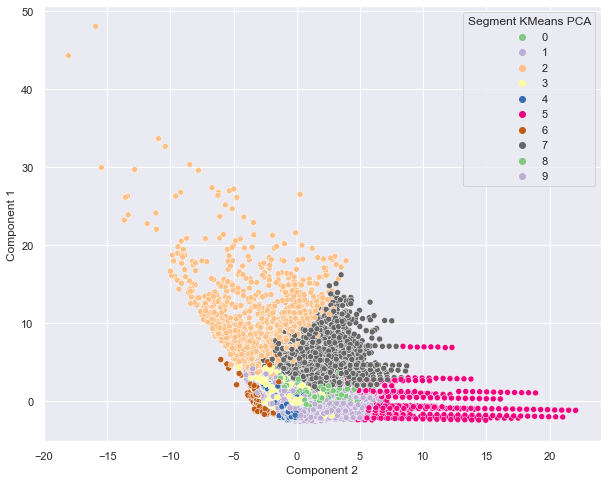

In [ ]:
x = df_k_means[f'Component {j}']
y = df_k_means[f'Component {i}']
sns.scatterplot(x, y, hue=df_k_means["Segment KMeans PCA"], palette="Accent")
sns.set(rc={'figure.figsize' :(20,15)})

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
range_n_clusters = [8,9,10,11,12]
df_scaled = StandardScaler().fit_transform(df)

X = df_scaled
for n in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 8 The average silhouette_score is : 0.06419821150115415
For n_clusters = 9 The average silhouette_score is : 0.07273192171460167


### Supervised Model : Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, StratifiedKFold
from sklearn.compose import make_column_transformer
import numpy as np

In [ ]:
last_df = df_k_means.drop([f"Component {i}" for i in range(1,21)], axis=1)
X = last_df.drop(["Segment KMeans PCA"], axis=1)
y = last_df["Segment KMeans PCA"]

processor = make_column_transformer((StandardScaler(), list(X.columns)))
estimator = make_pipeline(processor ,LogisticRegression(random_state=1, max_iter=1000))
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(90112, 24)

In [ ]:
model = estimator.fit(X_train, y_train)
prediction = model.predict(X_test)

model.score(X_test, y_test)
print(cross_val_score(model, X_train, y_train, cv=StratifiedKFold()).mean())
print(adjusted_rand_score(y_test, prediction))

0.9928089413462506

In [ ]:
train_size, train_score, val_score = learning_curve(estimator, X_train, y_train,train_sizes=np.linspace(0.1,1,50), cv=3,
                                                    shuffle=True)

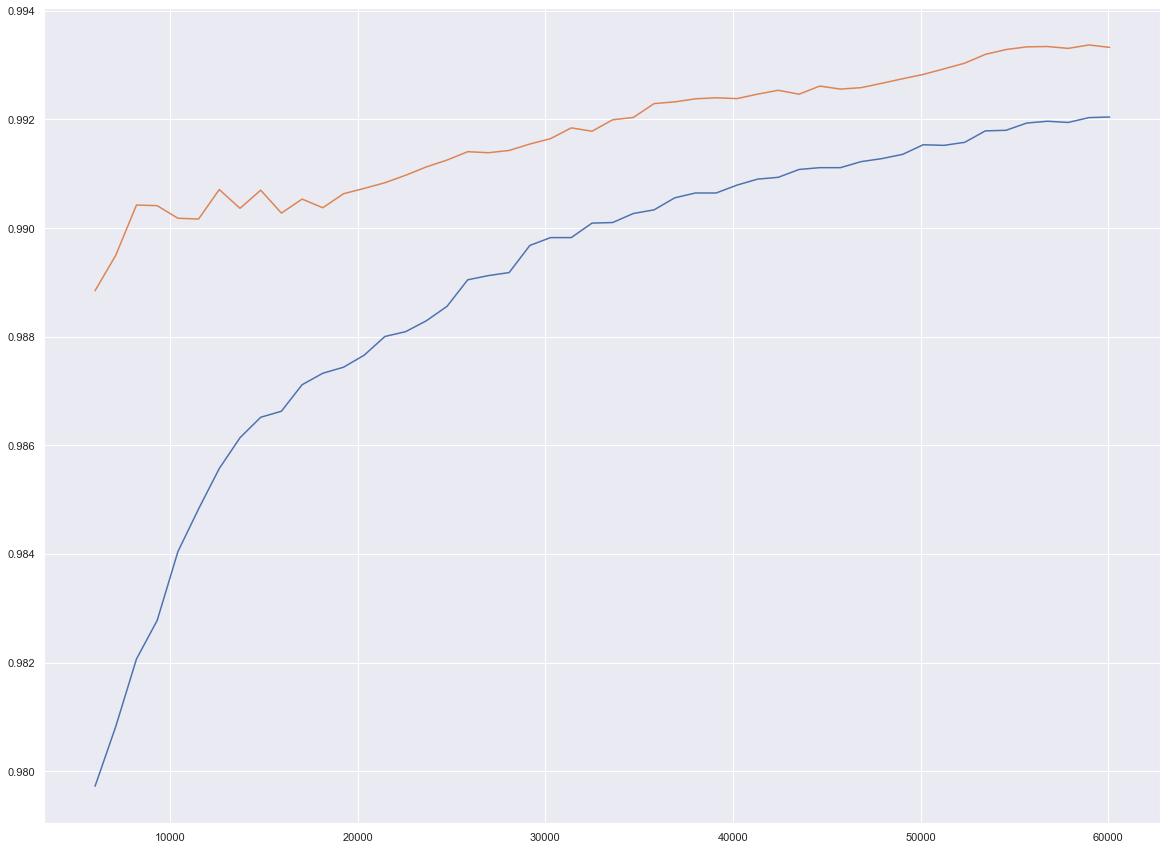

In [ ]:
plt.plot(train_size, val_score.mean(axis=1), label="Validation")
plt.plot(train_size, train_score.mean(axis=1), label="train")

### Etude statistique des clusters

In [ ]:
cluster_df = last_df[last_df["Segment KMeans PCA"] == 0].describe()
for i in range(1,10):
    cluster = last_df[last_df["Segment KMeans PCA"] == i].describe()
    cluster_df = pd.concat((cluster_df, cluster))
cluster_df

,customer_lat,customer_lng,order_status,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,product_height_cm,product_width_cm,seller_lat,seller_lng,order_time,recency,amount,frequency,product_category,Segment KMeans PCA
count,20720.000000,20720.000000,20720.0,20720.000000,20720.000000,20720.000000,20720.000000,20720.000000,20720.000000,20720.000000,...,20720.000000,20720.000000,20720.000000,20720.000000,20720.000000,20720.000000,20720.000000,20720.000000,20720.000000,20720.0
mean,-22.766769,-46.847378,1.0,113.390486,18.991090,1.006274,0.120029,3.998214,172.237705,4.027220,...,17.669739,35.781853,-22.782057,-47.877976,11.455068,270.530164,112.689431,1.701158,32.344691,0.0
std,3.357846,3.335915,0.0,83.107945,7.970236,0.081371,0.342078,3.157550,142.019629,1.367234,...,11.201322,11.766926,1.859485,1.977165,10.061782,154.384093,81.430591,1.722755,10.538245,0.0
min,-33.689948,-72.668881,1.0,5.300000,0.000000,1.000000,0.000000,1.000000,0.010000,1.000000,...,2.000000,11.000000,-30.111751,-63.893565,-154.000000,0.000000,5.300000,1.000000,0.000000,0.0
25%,-23.621471,-48.524585,1.0,59.900000,14.080000,1.000000,0.000000,1.000000,87.817500,4.000000,...,10.000000,30.000000,-23.552336,-48.829744,7.000000,144.000000,59.900000,1.000000,26.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,-23.000619,-60.754147,1.0,4.900000,0.000000,1.000000,0.000000,0.000000,0.390000,1.000000,...,2.000000,9.000000,-32.079231,-61.958415,-166.000000,5.000000,4.900000,1.000000,0.000000,9.0
25%,-12.149248,-41.671112,1.0,44.500000,20.500000,1.000000,0.000000,1.000000,72.840000,3.000000,...,7.000000,14.000000,-23.625475,-47.908417,6.000000,130.000000,44.990000,1.000000,26.000000,9.0
50%,-8.026658,-38.510534,1.0,79.900000,25.630000,1.000000,0.000000,2.000000,123.250000,5.000000,...,12.000000,19.000000,-23.468704,-46.701783,13.000000,238.000000,79.990000,1.000000,36.000000,9.0
75%,-4.566714,-36.518753,1.0,143.800000,35.780000,1.000000,0.000000,5.000000,203.810000,5.000000,...,20.000000,26.000000,-21.757321,-46.518679,19.000000,365.000000,143.540000,2.000000,45.000000,9.0


In [ ]:
pd.set_option('display.max_columns', None)
cluster_df[cluster_df["Segment KMeans PCA"] == 1]

,customer_lat,customer_lng,order_status,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_lat,seller_lng,order_time,recency,amount,frequency,product_category,Segment KMeans PCA
mean,-22.645836,-46.947031,1.0,74.594613,15.512556,1.263001,1.386245,1.0,110.521763,4.096471,47.805365,666.563032,1.824956,979.875936,25.890296,14.025849,19.752744,-22.986673,-47.403635,10.419069,240.992871,75.20853,2.210534,33.829572,1.0
min,-33.689948,-72.668881,1.0,0.850000,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,5.000000,4.000000,1.000000,25.000000,7.000000,2.000000,7.000000,-32.079231,-57.078952,-168.000000,0.000000,0.85000,1.000000,0.000000,1.0
25%,-23.627099,-48.577496,1.0,29.900000,11.860000,1.000000,1.000000,1.0,41.765000,4.000000,41.000000,329.000000,1.000000,200.000000,17.000000,7.000000,14.000000,-23.595499,-48.829744,6.000000,114.000000,29.99000,1.000000,26.000000,1.0
50%,-23.095159,-46.687923,1.0,52.110000,15.100000,1.000000,1.000000,1.0,72.320000,5.000000,50.000000,535.000000,1.000000,500.000000,22.000000,12.000000,18.000000,-23.431867,-46.735436,11.000000,224.000000,53.90000,1.000000,35.000000,1.0
75%,-21.541244,-44.717998,1.0,94.900000,17.980000,1.000000,2.000000,1.0,132.570000,5.000000,56.000000,874.000000,2.000000,1110.000000,30.000000,19.000000,24.000000,-21.866032,-46.523183,15.000000,352.000000,95.00000,2.000000,42.000000,1.0
max,2.835272,-37.057149,1.0,899.990000,98.020000,7.000000,3.000000,1.0,2202.400000,5.000000,64.000000,3947.000000,10.000000,16000.000000,105.000000,75.000000,91.000000,-11.834552,-39.262747,65.000000,694.000000,899.99000,35.000000,69.000000,1.0


In [ ]:
cluster_df[cluster_df.index == "min"]

,customer_lat,customer_lng,order_status,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_lat,seller_lng,order_time,recency,amount,frequency,product_category,Segment KMeans PCA
min,-33.689948,-72.668881,1.0,5.30,0.00,1.0,0.0,1.0,0.01,1.0,15.0,4.0,1.0,0.0,11.0,2.0,11.0,-30.111751,-63.893565,-154.0,0.0,5.30,1.0,0.0,0.0
min,-33.689948,-72.668881,1.0,0.85,0.00,1.0,0.0,1.0,0.00,1.0,5.0,4.0,1.0,25.0,7.0,2.0,7.0,-32.079231,-57.078952,-168.0,0.0,0.85,1.0,0.0,1.0
min,-32.040291,-72.668881,1.0,79.90,6.00,1.0,0.0,1.0,20.00,1.0,14.0,72.0,1.0,50.0,12.0,2.0,8.0,-30.111751,-63.893565,-97.0,3.0,284.99,1.0,4.0,2.0
min,-33.512901,-67.848538,1.0,6.90,0.00,1.0,0.0,1.0,0.05,1.0,12.0,55.0,1.0,50.0,11.0,2.0,6.0,-32.079231,-56.102861,-105.0,0.0,6.90,1.0,1.0,3.0
min,-33.689948,-68.749175,1.0,0.85,0.00,1.0,0.0,0.0,0.01,1.0,5.0,8.0,1.0,0.0,7.0,2.0,6.0,-32.079231,-63.893565,-189.0,0.0,0.85,1.0,0.0,4.0
min,-29.917005,-56.552026,1.0,9.00,3.28,1.0,0.0,1.0,0.13,1.0,18.0,58.0,1.0,50.0,16.0,2.0,11.0,-27.542880,-54.672139,-5.0,23.0,14.90,8.0,4.0,5.0
min,-32.176205,-67.828500,1.0,5.99,2.71,1.0,0.0,1.0,0.00,1.0,17.0,92.0,1.0,100.0,15.0,2.0,11.0,-16.432027,-44.248163,-135.0,5.0,5.99,1.0,4.0,6.0
min,-32.561057,-68.502935,1.0,18.50,0.00,1.0,0.0,1.0,3.26,1.0,5.0,61.0,1.0,250.0,13.0,2.0,11.0,-30.111751,-63.893565,-176.0,0.0,18.50,1.0,4.0,7.0
min,-27.442895,-48.401481,0.0,21.50,0.48,1.0,0.0,1.0,35.61,1.0,23.0,259.0,1.0,100.0,17.0,11.0,14.0,-23.686359,-46.787489,-13.0,190.0,21.50,1.0,16.0,8.0
min,-23.000619,-60.754147,1.0,4.90,0.00,1.0,0.0,0.0,0.39,1.0,6.0,30.0,1.0,0.0,11.0,2.0,9.0,-32.079231,-61.958415,-166.0,5.0,4.90,1.0,0.0,9.0


In [ ]:
cluster_df[cluster_df.index == "50%"]

,customer_lat,customer_lng,order_status,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_lat,seller_lng,order_time,recency,amount,frequency,product_category,Segment KMeans PCA
50%,-23.009699,-46.667265,1.0,89.90,17.60,1.0,0.0,3.0,132.160,5.0,54.0,408.0,1.0,1800.0,41.0,15.0,35.0,-22.740325,-47.664701,12.0,268.0,89.90,1.0,27.0,0.0
50%,-23.095159,-46.687923,1.0,52.11,15.10,1.0,1.0,1.0,72.320,5.0,50.0,535.0,1.0,500.0,22.0,12.0,18.0,-23.431867,-46.735436,11.0,224.0,53.90,1.0,35.0,1.0
50%,-22.716509,-46.598078,1.0,1008.00,35.36,1.0,0.0,8.0,1149.830,5.0,53.0,1271.5,2.0,3000.0,31.0,23.0,27.0,-23.429964,-46.638325,12.0,205.0,999.99,1.0,49.0,2.0
50%,-23.101621,-46.686376,1.0,79.99,15.55,1.0,0.0,2.0,113.900,5.0,56.0,1166.0,5.0,650.0,23.0,12.0,18.0,-23.543150,-46.703810,11.0,184.0,80.00,1.0,35.0,3.0
50%,-23.111897,-46.666228,1.0,54.90,15.10,1.0,0.0,2.0,85.575,5.0,47.0,531.0,1.0,363.0,20.0,12.0,16.0,-23.433450,-46.735882,12.0,200.0,56.00,1.0,36.0,4.0
50%,-23.433619,-46.571079,1.0,79.99,17.76,8.5,2.0,1.0,9.100,5.0,46.0,582.0,1.0,1300.0,36.0,15.0,23.5,-22.740325,-47.457380,10.0,385.0,71.40,24.0,33.0,5.0
50%,-20.627032,-44.447383,1.0,149.90,24.21,1.0,0.0,2.0,173.290,5.0,50.0,1111.0,1.0,533.0,22.0,11.0,19.0,-8.135891,-38.337875,13.0,145.0,149.90,1.0,38.0,6.0
50%,-22.902823,-46.622670,1.0,185.90,43.78,1.0,0.0,3.0,291.360,5.0,50.0,831.0,1.0,11875.0,50.0,50.0,36.0,-23.486111,-46.573405,11.0,216.0,179.99,1.0,45.0,7.0
50%,-22.936911,-44.097020,0.0,59.90,14.10,1.0,0.0,2.0,140.220,1.0,36.0,605.0,1.0,610.0,20.0,15.0,17.0,-22.540797,-43.201235,41.0,689.0,54.90,1.0,36.0,8.0
50%,-8.026658,-38.510534,1.0,79.90,25.63,1.0,0.0,2.0,123.250,5.0,52.0,610.0,2.0,575.0,22.0,12.0,19.0,-23.468704,-46.701783,13.0,238.0,79.99,1.0,36.0,9.0


In [ ]:
cluster_df[cluster_df.index == "max"]

,customer_lat,customer_lng,order_status,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_lat,seller_lng,order_time,recency,amount,frequency,product_category,Segment KMeans PCA
max,2.854530,-35.021565,1.0,738.00,84.00,3.0,3.0,24.0,1591.24,5.0,72.0,3571.0,9.0,21200.0,105.0,85.0,105.0,-8.766195,-40.295493,134.0,694.0,738.00,35.0,69.0,0.0
max,2.835272,-37.057149,1.0,899.99,98.02,7.0,3.0,1.0,2202.40,5.0,64.0,3947.0,10.0,16000.0,105.0,75.0,91.0,-11.834552,-39.262747,65.0,694.0,899.99,35.0,69.0,1.0
max,2.829995,-34.827391,1.0,6735.00,409.68,7.0,3.0,24.0,13664.08,5.0,63.0,3992.0,10.0,30000.0,105.0,105.0,100.0,-3.131672,-34.855866,50.0,693.0,6735.00,10.0,70.0,2.0
max,-1.059169,-36.568257,1.0,809.00,81.79,4.0,3.0,24.0,1761.64,5.0,76.0,3988.0,20.0,15225.0,105.0,80.0,60.0,-14.518475,-39.075629,70.0,694.0,809.00,15.0,69.0,3.0
max,2.846929,-39.041550,1.0,849.00,121.22,2.0,1.0,24.0,1349.05,5.0,67.0,3173.0,6.0,17175.0,76.0,75.0,51.0,-3.131672,-40.275819,146.0,694.0,885.15,26.0,70.0,4.0
max,-3.663526,-38.683755,1.0,723.74,99.56,26.0,2.0,1.0,79.96,5.0,63.0,2396.0,8.0,25900.0,70.0,66.0,67.0,-15.867325,-43.211925,42.0,589.0,723.74,75.0,68.0,5.0
max,2.811251,-34.839881,1.0,979.00,127.82,7.0,3.0,24.0,1299.28,5.0,63.0,3858.0,10.0,19150.0,104.0,76.0,65.0,-2.501242,-34.855616,51.0,690.0,979.00,24.0,70.0,6.0
max,2.855558,-34.812921,1.0,1050.00,312.41,7.0,3.0,24.0,2844.96,5.0,64.0,3927.0,15.0,40425.0,105.0,105.0,118.0,-3.717490,-38.337875,123.0,694.0,1119.21,15.0,70.0,7.0
max,-19.908046,-43.178276,0.0,249.90,29.94,1.0,0.0,5.0,263.93,5.0,60.0,1118.0,6.0,2250.0,22.0,50.0,32.0,-21.693371,-43.187264,45.0,694.0,249.90,2.0,42.0,8.0
max,2.835272,-34.725130,1.0,829.00,171.32,6.0,3.0,24.0,1784.20,5.0,64.0,3976.0,12.0,16283.0,105.0,105.0,82.0,-3.131672,-39.262747,139.0,694.0,863.50,12.0,69.0,9.0


In [ ]:
cluster_df[cluster_df.index == "count"]["Segment KMeans PCA"]

count    20720.0
count    19498.0
count     1626.0
count    15248.0
count    37510.0
count      452.0
count     1523.0
count     6464.0
count        7.0
count     9593.0
Name: Segment KMeans PCA, dtype: float64

* Cluster 0 =>
* Cluster 1 => 
* Cluster 2 => Panier moyen élevé  Produits Chers
* Cluster 3 => Bcp de photos de produits
* Cluster 4 =>
* Cluster 5 => Client avec bcp de commande
* Cluster 6 => Paye de nombreuses manières différentes
* Cluster 7 => Frais de port ? Produits Chers
* Cluster 8 => Client mécontent (mauvaise note, colis pas livré, panier moyen faible, ...)
* Cluster 9 => 

Important de noter que le nombre de clients très mécontents sont peu nombreux (7)